In [9]:
import pytesseract
from pytesseract import Output
import pdf2image
import cv2
import os
import matplotlib.pyplot as plt
import glob

In [10]:
#pdf_path = '/home/dhiraj/Documents/mestro-invoices/eval/Skellefteå Kraft/faktura-30156795319.pdf'
#working_dir = '/home/dhiraj/Documents/mestro-invoices/eval/Skellefteå Kraft/images'


pdf_dir = '/home/dhiraj/ocr/Mestro/data/set_3'
working_dir = '/home/dhiraj/ocr/Mestro/data/set_3_images' 

dpi = 300


In [12]:
import xml.etree.ElementTree as ET

classes =  ['m','h','fm1','fm2','fm3','fd','t','ms']

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(output_path, in_file):
    basename = os.path.basename(in_file)
    basename_no_ext = os.path.splitext(basename)[0]

    with open(output_path + basename_no_ext + '.txt', "w") as out_file :
        tree = ET.parse(in_file)
        root = tree.getroot()
        size = root.find('size')
        w = int(size.find('width').text)
        h = int(size.find('height').text)

        for obj in root.iter('object'):
            difficult = obj.find('difficult').text
            cls = obj.find('name').text
            if cls not in classes or int(difficult)==1:
                continue
            cls_id = classes.index(cls)
            xmlbox = obj.find('bndbox')
            b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
            bb = convert((w,h), b)
            out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')


from shutil import copy

def copy_im(output_path,im_dir, in_file):
    basename = os.path.basename(in_file)
    basename_no_ext = os.path.splitext(basename)[0]

    copy(im_dir + basename_no_ext +'.jpg' , output_path)


In [14]:
# ann_dir = '/home/dhiraj/ocr/Mestro/data/annotaions/20/mixed_annotaions/mixed_annotaions'
# outpu_dir = '/home/dhiraj/ocr/Mestro/data/annotaions/20/mixed_annotaions/yolo_annotaions/'

# for ann in glob.glob(ann_dir + '/*.xml'):
#     convert_annotation(outpu_dir,ann)




In [15]:
# copy im 



In [12]:
#http://meity-dev.anuvaad.org/aai4b-nmt-inference/v1.1/translate

#ulca env

# Extract images

In [11]:
# for pdf_path in glob.glob(pdf_dir + '/*.pdf'):
    

#     image_filename = pdf_path.split('/')[-1][:-4]
#     print(pdf_path, image_filename)
#     images = pdf2image.convert_from_path(pdf_path, dpi=dpi, output_file=image_filename, output_folder=working_dir, fmt='jpg', paths_only=True)

/home/dhiraj/ocr/Mestro/data/set_3/faktura-30156425016.pdf faktura-30156425016
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30172828615.pdf faktura-30172828615
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30157046514.pdf faktura-30157046514
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30156642115.pdf faktura-30156642115
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30138446411.pdf faktura-30138446411
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30138152712.pdf faktura-30138152712
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30137567217.pdf faktura-30137567217
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30156102417.pdf faktura-30156102417
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30154065715.pdf faktura-30154065715
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30137570112.pdf faktura-30137570112
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30137569114.pdf faktura-30137569114
/home/dhiraj/ocr/Mestro/data/set_3/faktura-30138282618.pdf faktura-30138282618
/home/dhiraj/ocr/Mestro/data/set_3/faktura-301545030

In [ ]:
images[:3]

# Read annotaions 

In [4]:
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text
        clss = None
        ymin, xmin, ymax, xmax = None, None, None, None


        clss = str(boxes.find("name").text)
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append( {'class' : clss  ,'box' : list_with_single_boxes }  )

    return filename, list_with_all_boxes

In [5]:
def crop_im(im,coord,show=True):
    xmin,ymin,xmax,ymax = coord
    crop = im[ymin:ymax,xmin:xmax]
    if show:
        plt.imshow(crop)
    return crop

def ocr(im):
    return pytesseract.image_to_string(im,lang='Latin')

In [53]:
images_dir = '/home/dhiraj/Documents/mestro-invoices/eval/Skellefteå Kraft/images'

In [54]:
xml_path = '/home/dhiraj/Documents/mestro-invoices/eval/Skellefteå Kraft/annotations/type_2/fakt0001-03.xml'

In [55]:
im_name, boxes = read_content(xml_path)

In [56]:
boxes

[{'class': 'header', 'box': [1313, 65, 2280, 273]},
 {'class': 'meterstand', 'box': [176, 522, 2307, 673]},
 {'class': 'facility_meta_1', 'box': [197, 692, 1402, 878]},
 {'class': 'facility_meta_2', 'box': [1435, 695, 2267, 874]},
 {'class': 'faciltity_data', 'box': [195, 929, 2299, 1299]},
 {'class': 'total', 'box': [172, 1303, 2307, 1373]},
 {'class': 'meterstand', 'box': [177, 1550, 2295, 1685]},
 {'class': 'facility_meta_1', 'box': [193, 1725, 1174, 1906]},
 {'class': 'facility_meta_2', 'box': [1437, 1720, 2262, 1917]},
 {'class': 'faciltity_data', 'box': [190, 1968, 2278, 2338]},
 {'class': 'total', 'box': [176, 2339, 2309, 2394]},
 {'class': 'meterstand', 'box': [190, 2597, 2300, 2732]},
 {'class': 'facility_meta_1', 'box': [186, 2767, 1160, 2945]},
 {'class': 'facility_meta_2', 'box': [1435, 2757, 2265, 2952]},
 {'class': 'faciltity_data', 'box': [187, 3002, 2289, 3285]},
 {'class': 'facility_meta_3', 'box': [198, 889, 1299, 929]},
 {'class': 'facility_meta_3', 'box': [199, 1920

In [57]:
image_path = os.path.join(images_dir,im_name)
image = cv2.imread(image_path)

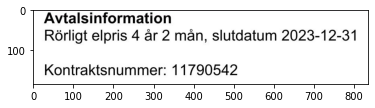

In [11]:
box_index = 1
_= crop_im(image, boxes[box_index]['box'])

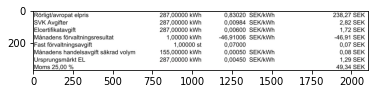

In [58]:
box_index = 4
_= crop_im(image, boxes[box_index]['box'])

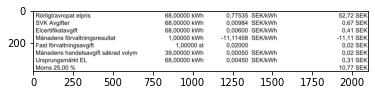

In [13]:
box_index = 2
_= crop_im(image, boxes[box_index]['box'])

# OCR

In [14]:
def get_text(boxes,image,skip_class=[]):
    for box_index,box in enumerate(boxes) : 
        print('processing : ',box_index)
        crop_cls = boxes[box_index]['class']
        if crop_cls not in skip_class :
            crop = crop_im(image, boxes[box_index]['box'],show=False)
            boxes[box_index]['text'] = ocr(crop)
    return boxes

faciltity_data 
 Rörligt/avropat elpris

SVK Avgifter

Elcertifikatavgift

Månadens förvaltningsresultat

Fast förvaltningsavgift

Månadens handelsavgift säkrad volym
Ursprungsmärkt EL

Moms 25,00 %

287,00000 kWh
287,00000 kWh
287,00000 kWh
1,00000 kWh
1,00000 st
155,00000 kWh
287,00000 kWh

0,83020 SEK/kWh

0,00984 SEK/kWh

0,00600 SEK/kWh
-46,91006 SEK/kWh

0,07000

0,00050 SEK/kWh

0,00450 SEK/kWh

238,27 SEK
2,82 SEK
1,72 SEK

-46,91 SEK
0,07 SEK
0,08 SEK
1,29 SEK

49,34 SEK



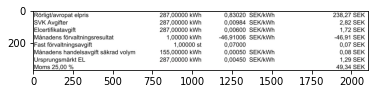

In [59]:
box_index = 4
crop_cls = boxes[box_index]['class']
crop = crop_im(image, boxes[box_index]['box'])

text = ocr(crop)
print(crop_cls, '\n',text)

# Post-processing

In [16]:
import re

In [17]:
#design An abstract class for PostProcessing, define all the necceray methods for post-processing an invoice
#For every new invoice we can inherit from PostProcessing and make changes in flow whenever required

#To be read form a config file
col_end_pattern = r'^\d.* (kWh|st)$' 

def post_process(raw_layouts):
    grouped_data = {}
    for layout_index, layout in enumerate(raw_layouts):
        cls = layout['class']
        raw_layouts[layout_index]['data'] = process_class(cls,layout['text'])

    return raw_layouts


def process_class(cls,text):
    if cls == 'facility_data':
        return process_facility_data(text,col_end_pattern)
    
    if cls == 'c2':
        return c2_process(text)

def process_facility_data(text,col_end_pattern):
    app_context = {}
    filter_text = ['\x0c' , '\f' ,'\v' , '\x0b', None, '' ,'SEK/kWh']

    app_context['lines'] = [line for line in text.split('\n') if line not in filter_text]
    app_context['col_end_index'] = find_pattern_index(app_context['lines'], col_end_pattern)

    return partition_columns(app_context)


def c2_process(text):
    return {}


In [61]:
def find_pattern_index(lis,pattern):
    #returns the first occurance of a given pattern
    return lis.index([i for i in lis if re.findall(pattern, i)][0])

def is_incomplete(app_context):

    """
    For Skellefteå Kraft if Moms(VAT) is not the last row of first column then the block is incomplete
    """
    col_end_index = app_context['col_end_index']
    if 'Moms' in app_context['lines'][col_end_index -1] :
        return False
    return True


def partition_columns(app_context):
    if is_incomplete(app_context) :
        print('HO')
        return partial_parition(app_context)
    print('HA')
    return complete_partitiion(app_context)


def complete_partitiion(app_context,data={}):
    row_count = app_context['col_end_index'] - 1
    start = 0
    first_col = app_context['lines'][start: start + row_count]
    start = row_count +1
    second_col = app_context['lines'][start: start + row_count]
    start += row_count
    third_col = app_context['lines'][start: start + row_count]
    start += row_count
    fourth_col = app_context['lines'][start: start + row_count]

    data['invoiceRows'] = map_cols(first_col,second_col,third_col,fourth_col)
    data['VAT']  = app_context['lines'][-1]

    return data



def partial_parition(app_context):
    return {}


def map_cols(col_1,col_2,col_3,col_4):
    print(col_1)
    mapped_cols = []
    for index in range(len(col_1)):
        unit = ''
        if 'st' not in col_2[index]:
            unit =' SEK/kWh'
        mapped_cols.append(
            {
                'text' : col_1[index],
                'spec' : '{} {}{}'.format(col_2[index] , col_3[index],unit),
                'value' : col_4[index]

            }

        )
    return mapped_cols



In [60]:
print(boxes)

[{'class': 'header', 'box': [1313, 65, 2280, 273]}, {'class': 'meterstand', 'box': [176, 522, 2307, 673]}, {'class': 'facility_meta_1', 'box': [197, 692, 1402, 878]}, {'class': 'facility_meta_2', 'box': [1435, 695, 2267, 874]}, {'class': 'faciltity_data', 'box': [195, 929, 2299, 1299]}, {'class': 'total', 'box': [172, 1303, 2307, 1373]}, {'class': 'meterstand', 'box': [177, 1550, 2295, 1685]}, {'class': 'facility_meta_1', 'box': [193, 1725, 1174, 1906]}, {'class': 'facility_meta_2', 'box': [1437, 1720, 2262, 1917]}, {'class': 'faciltity_data', 'box': [190, 1968, 2278, 2338]}, {'class': 'total', 'box': [176, 2339, 2309, 2394]}, {'class': 'meterstand', 'box': [190, 2597, 2300, 2732]}, {'class': 'facility_meta_1', 'box': [186, 2767, 1160, 2945]}, {'class': 'facility_meta_2', 'box': [1435, 2757, 2265, 2952]}, {'class': 'faciltity_data', 'box': [187, 3002, 2289, 3285]}, {'class': 'facility_meta_3', 'box': [198, 889, 1299, 929]}, {'class': 'facility_meta_3', 'box': [199, 1920, 1300, 1968]}, 

In [62]:
text

'Rörligt/avropat elpris\n\nSVK Avgifter\n\nElcertifikatavgift\n\nMånadens förvaltningsresultat\n\nFast förvaltningsavgift\n\nMånadens handelsavgift säkrad volym\nUrsprungsmärkt EL\n\nMoms 25,00 %\n\n287,00000 kWh\n287,00000 kWh\n287,00000 kWh\n1,00000 kWh\n1,00000 st\n155,00000 kWh\n287,00000 kWh\n\n0,83020 SEK/kWh\n\n0,00984 SEK/kWh\n\n0,00600 SEK/kWh\n-46,91006 SEK/kWh\n\n0,07000\n\n0,00050 SEK/kWh\n\n0,00450 SEK/kWh\n\n238,27 SEK\n2,82 SEK\n1,72 SEK\n\n-46,91 SEK\n0,07 SEK\n0,08 SEK\n1,29 SEK\n\n49,34 SEK\n\x0c'

In [63]:
process_facility_data(text,col_end_pattern)

HA
['Rörligt/avropat elpris', 'SVK Avgifter', 'Elcertifikatavgift', 'Månadens förvaltningsresultat', 'Fast förvaltningsavgift', 'Månadens handelsavgift säkrad volym', 'Ursprungsmärkt EL']


{'invoiceRows': [{'text': 'Rörligt/avropat elpris',
   'spec': '287,00000 kWh 0,83020 SEK/kWh SEK/kWh',
   'value': '238,27 SEK'},
  {'text': 'SVK Avgifter',
   'spec': '287,00000 kWh 0,00984 SEK/kWh SEK/kWh',
   'value': '2,82 SEK'},
  {'text': 'Elcertifikatavgift',
   'spec': '287,00000 kWh 0,00600 SEK/kWh SEK/kWh',
   'value': '1,72 SEK'},
  {'text': 'Månadens förvaltningsresultat',
   'spec': '1,00000 kWh -46,91006 SEK/kWh SEK/kWh',
   'value': '-46,91 SEK'},
  {'text': 'Fast förvaltningsavgift',
   'spec': '1,00000 st 0,07000',
   'value': '0,07 SEK'},
  {'text': 'Månadens handelsavgift säkrad volym',
   'spec': '155,00000 kWh 0,00050 SEK/kWh SEK/kWh',
   'value': '0,08 SEK'},
  {'text': 'Ursprungsmärkt EL',
   'spec': '287,00000 kWh 0,00450 SEK/kWh SEK/kWh',
   'value': '1,29 SEK'}],
 'VAT': '49,34 SEK'}

In [20]:
goruped_layout = post_process(raw_layouts=boxes)

KeyError: 'text'

In [ ]:
print(goruped_layout)

[{'class': 'facility_meta_1', 'box': [205, 500, 1324, 669], 'text': 'Anläggningsinformation\n\nAnläggningsadress: Jungfruvägen 127B LGH 1001 79134 Falun\nAnläggningsid: 735999227001018001\n\nOmrådesiID: FLN\n\x0c', 'data': None}, {'class': 'facility_meta_2', 'box': [1449, 497, 2284, 681], 'text': 'Avtalsinformation\nRörligt elpris 4 år 2 mån, slutdatum 2023-12-31\n\nKontraktsnummer: 11790542\n\x0c', 'data': None}, {'class': 'facility_data', 'box': [208, 725, 2307, 1100], 'text': 'Rörligt/avropat elpris\n\nSVK Avgifter\n\nElcertifikatavgift\n\nMånadens förvaltningsresultat\n\nFast förvaltningsavgift\n\nMånadens handelsavgift säkrad volym\nUrsprungsmärkt EL\n\nMoms 25,00 %\n\n68,00000 kWh\n68,00000 kWh\n68,00000 kWh\n1,00000 kWh\n1,00000 st\n39,00000 kWh\n68,00000 kWh\n\n0,77535\n0,00984\n0,00600\n-11,11458\n0,02000\n0,00050\n0,00450\n\nSEK/kWh\nSEK/kWh\nSEK/kWh\nSEK/kWh\n\nSEK/kWh\nSEK/kWh\n\n52,72 SEK\n0,67 SEK\n0,41 SEK\n\n-11,11 SEK\n0,02 SEK\n0,02 SEK\n0,31 SEK\n\n10,77 SEK\n\x0c', 

In [ ]:
goruped_layout[2]

{'class': 'facility_data',
 'box': [208, 725, 2307, 1100],
 'text': 'Rörligt/avropat elpris\n\nSVK Avgifter\n\nElcertifikatavgift\n\nMånadens förvaltningsresultat\n\nFast förvaltningsavgift\n\nMånadens handelsavgift säkrad volym\nUrsprungsmärkt EL\n\nMoms 25,00 %\n\n68,00000 kWh\n68,00000 kWh\n68,00000 kWh\n1,00000 kWh\n1,00000 st\n39,00000 kWh\n68,00000 kWh\n\n0,77535\n0,00984\n0,00600\n-11,11458\n0,02000\n0,00050\n0,00450\n\nSEK/kWh\nSEK/kWh\nSEK/kWh\nSEK/kWh\n\nSEK/kWh\nSEK/kWh\n\n52,72 SEK\n0,67 SEK\n0,41 SEK\n\n-11,11 SEK\n0,02 SEK\n0,02 SEK\n0,31 SEK\n\n10,77 SEK\n\x0c',
 'data': {'invoiceRows': [{'text': 'Rörligt/avropat elpris',
    'spec': '829,00000 kWh 0,64906 SEK/kWh',
    'value': '538,07 SEK'},
   {'text': 'SVK Avgifter',
    'spec': '829,00000 kWh 0,00984 SEK/kWh',
    'value': '8,16 SEK'},
   {'text': 'Elcertifikatavgift',
    'spec': '829,00000 kWh 0,00600 SEK/kWh',
    'value': '4,97 SEK'},
   {'text': 'Månadens förvaltningsresultat',
    'spec': '1,00000 kWh -135,499

In [70]:
xml_path = '/home/dhiraj/Documents/mestro-invoices/eval/Skellefteå Kraft/annotations/type_2/fakt0001-04.xml'

In [71]:
im_name, boxes = read_content(xml_path)
image_path = os.path.join(images_dir,im_name)
image = cv2.imread(image_path)
print(len(boxes), boxes)

20 [{'class': 'h', 'box': [1294, 64, 2294, 282]}, {'class': 'fd', 'box': [179, 390, 2291, 493]}, {'class': 't', 'box': [167, 494, 2296, 551]}, {'class': 'ms', 'box': [170, 740, 2287, 876]}, {'class': 'fm1', 'box': [182, 915, 1191, 1101]}, {'class': 'fm2', 'box': [1434, 906, 2251, 1101]}, {'class': 'fd', 'box': [189, 1156, 2289, 1533]}, {'class': 't', 'box': [181, 1528, 2288, 1578]}, {'class': 'ms', 'box': [188, 1785, 2291, 1922]}, {'class': 'fm1', 'box': [187, 1955, 1193, 2125]}, {'class': 'fm2', 'box': [1433, 1957, 2257, 2143]}, {'class': 'fd', 'box': [185, 2188, 2303, 2561]}, {'class': 't', 'box': [178, 2560, 2303, 2619]}, {'class': 'ms', 'box': [188, 2816, 2296, 2961]}, {'class': 'fm1', 'box': [191, 2990, 1215, 3160]}, {'class': 'fm2', 'box': [1449, 2987, 2251, 3167]}, {'class': 'fd', 'box': [197, 3225, 2296, 3283]}, {'class': 'fm3', 'box': [198, 1113, 1296, 1157]}, {'class': 'fm3', 'box': [198, 2149, 1302, 2191]}, {'class': 'fm3', 'box': [198, 3174, 1289, 3226]}]


In [72]:
raw_layouts = get_text(boxes=boxes)
print(raw_layouts)

processing :  0
processing :  1
processing :  2
processing :  3
processing :  4
processing :  5
processing :  6
processing :  7
processing :  8
processing :  9
processing :  10
processing :  11
processing :  12
processing :  13
processing :  14
processing :  15
processing :  16
processing :  17
processing :  18
processing :  19
[{'class': 'h', 'box': [1294, 64, 2294, 282], 'text': '4(20)\nFakturadatum 2021-11-03\nKundnr 874363\nFakturanr/OCR-nr 30156795319\n\x0c'}, {'class': 'fd', 'box': [179, 390, 2291, 493], 'text': 'Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK\nMoms 25,00 % 34,78 SEK\n\x0c'}, {'class': 't', 'box': [167, 494, 2296, 551], 'text': '| Totalt 173,89 SEK\n\x0c'}, {'class': 'ms', 'box': [170, 740, 2287, 876], 'text': 'Mätarnummer: 77143 Mätarställning Förbrukning Beräknad årsförbrukning\nEnergiförbrukning 2021-10-31 0,00 295 kWh 3 143 kWh\n\n \n\x0c'}, {'class': 'fm1', 'box': [182, 915, 1191, 1101], 'text': 'Anläggningsinformation\n\nAnläggningsadress: Jungfruv

In [73]:
goruped_layout = post_process(raw_layouts=raw_layouts)
print(goruped_layout)

[{'class': 'h', 'box': [1294, 64, 2294, 282], 'text': '4(20)\nFakturadatum 2021-11-03\nKundnr 874363\nFakturanr/OCR-nr 30156795319\n\x0c', 'data': None}, {'class': 'fd', 'box': [179, 390, 2291, 493], 'text': 'Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK\nMoms 25,00 % 34,78 SEK\n\x0c', 'data': None}, {'class': 't', 'box': [167, 494, 2296, 551], 'text': '| Totalt 173,89 SEK\n\x0c', 'data': None}, {'class': 'ms', 'box': [170, 740, 2287, 876], 'text': 'Mätarnummer: 77143 Mätarställning Förbrukning Beräknad årsförbrukning\nEnergiförbrukning 2021-10-31 0,00 295 kWh 3 143 kWh\n\n \n\x0c', 'data': None}, {'class': 'fm1', 'box': [182, 915, 1191, 1101], 'text': 'Anläggningsinformation\n\nAnläggningsadress: Jungfruvägen 101a-101b 79134 Falun\nAnläggningsid: 735999227001322771\n\nOmrådesiID: FLN\n\x0c', 'data': None}, {'class': 'fm2', 'box': [1434, 906, 2251, 1101], 'text': 'Avtalsinformation\nRörligt elpris 4 år 2 mån, slutdatum 2023-12-31\n\nKontraktsnummer: 11790658\n\x0c', 'data': 

In [74]:
layout_index = -1


In [76]:


layout_index +=1
goruped_layout[layout_index]

{'class': 'fd',
 'box': [179, 390, 2291, 493],
 'text': 'Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK\nMoms 25,00 % 34,78 SEK\n\x0c',
 'data': None}

In [82]:
text = 'Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK\nMoms 25,00 % 34,78 SEK\n\x0c'

filter_text = ['\x0c' , '\f' ,'\v' , '\x0b', None, '' ,'SEK/kWh']

lines = [line for line in text.split('\n') if line not in filter_text]

In [80]:
col_end_pattern = r'^\d.* (kWh|st)$' 
find_pattern_index(text,col_end_pattern)

IndexError: list index out of range

In [81]:
print(text)

Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK
Moms 25,00 % 34,78 SEK



In [83]:
lines

['Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK',
 'Moms 25,00 % 34,78 SEK']

In [ ]:
lis.index([i for i in lis if re.findall(col_end_pattern, i)][0])

In [90]:
col_end_pattern = r'^\d.* (kWh|st)$' 
re.findall(col_end_pattern, lines[0] )

[]

In [ ]:
date_index

In [68]:
layout_name = { 'm' : 'meta',
    'h' : 'header' ,
 'fm1' : 'facility-meta-1' ,
  'fm1' : 'facility-meta-1',
  'fm1' : 'facility-meta-1' 
  ,'fd' : 'facility_data', 
  'ms'   : 'meterstand',
  't'    : 'total'}

In [69]:
a = {'class': 'fd', 'box': [179, 390, 2291, 493], 'text': 'Ursprungsmärkt EL 295,00000 kWh 0,00450 SEK/kWh 1,33 SEK\nMoms 25,00 % 34,78 SEK\n\x0c'}